In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

In [2]:
df=pd.read_csv('Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [11]:
df.loc[df['Chance of Admit '] < 0.80, 'Chance of Admit '] = 0
df.loc[df['Chance of Admit '] >= 0.80, 'Chance of Admit '] = 1
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,0
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,0
4,5,314,103,2,2.0,3.0,8.21,0,0


In [12]:
X = df.drop(['Chance of Admit ','Serial No.'],axis=1)
y = df['Chance of Admit ']

In [15]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [16]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: Chance of Admit , dtype: int64

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.25,random_state=123)
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)

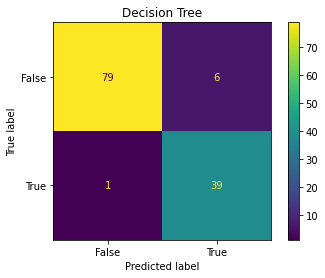

In [29]:
confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.title("Decision Tree")
plt.show()


In [30]:
print("1. Accuracy Score:", metrics.accuracy_score(Y_test, y_pred))
print("2. Precision Score:",metrics.precision_score(Y_test, y_pred))
print("3. Recall Score:", metrics.recall_score(Y_test, y_pred))
print("4. f1 Score:", metrics.f1_score(Y_test, y_pred))

1. Accuracy Score: 0.944
2. Precision Score: 0.8666666666666667
3. Recall Score: 0.975
4. f1 Score: 0.9176470588235294
